## Generate and visualize synthetic binary classification data

- Create two Gaussian clusters for binary classes (0 and 1) in 2D.
- Stack them to form the dataset and plot to visualize separability.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

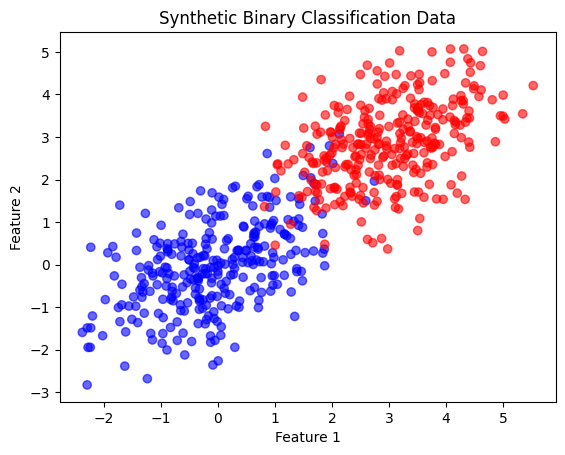

In [ ]:
np.random.seed(int(time()))  # time seed for reproducibility
num_obs = 300
mean0 = [0, 0]
cov0 = [[1, 0.5], [0.5, 1]]
mean1 = [3, 3]
cov1 = [[1, 0.5], [0.5, 1]]

x0 = np.random.multivariate_normal(mean0, cov0, num_obs)
x1 = np.random.multivariate_normal(mean1, cov1, num_obs)

X_log = np.vstack((x0, x1))  # shape: (2*num_obs, 2)
y_log = np.hstack((np.zeros(num_obs), np.ones(num_obs)))  # shape: (2*num_obs,)

# visualize the data
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_log, cmap='bwr', alpha=0.6)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Logistic Regression (Gradient Descent)

- Define a simple logistic regression class using batch gradient descent.
- Includes sigmoid activation, fit, predict_proba, and predict methods.

In [4]:
class LogisticRegressionGD:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None  # shape: (n_features,)
        self.bias = None      # scalar

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples,)
        """
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for i in range(self.n_iters):
            linear_model = X.dot(self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1/n_samples) * X.T.dot(y_predicted - y)
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.weights) + self.bias)

    def predict(self, X):
        """
        Return class labels 0 or 1
        """
        return (self.predict_proba(X) >= 0.5).astype(int)

## Train, evaluate, and visualize decision boundary

- Train the logistic regression model on the synthetic data.
- Compute accuracy, precision, and recall metrics.
- Plot the decision boundary to visualize model performance.

Logistic Regression Accuracy: 0.97
Logistic Regression Precision: 0.9577922077922078
Logistic Regression Recall: 0.9833333333333333


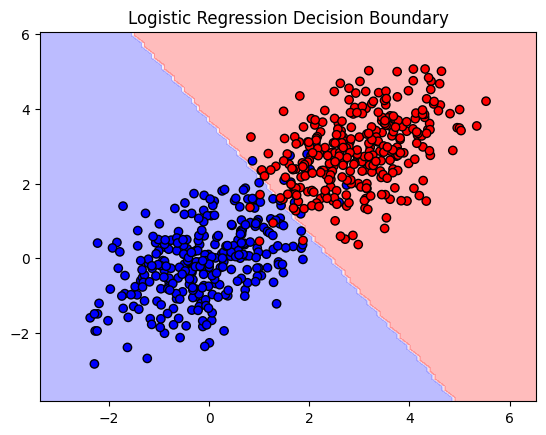

In [5]:
model_log = LogisticRegressionGD(lr=0.1, n_iters=2000)
model_log.fit(X_log, y_log)
y_proba = model_log.predict_proba(X_log)
y_pred_log = model_log.predict(X_log)

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_score(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    if true_positive + false_positive == 0:
        return 0.0
    return true_positive / (true_positive + false_positive)

def recall_score(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    if true_positive + false_negative == 0:
        return 0.0
    return true_positive / (true_positive + false_negative)

# Compute and print metrics
acc_log = accuracy_score(y_log, y_pred_log)
prec_log = precision_score(y_log, y_pred_log)
rec_log = recall_score(y_log, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log}")
print(f"Logistic Regression Precision: {prec_log}")
print(f"Logistic Regression Recall: {rec_log}")

# Optional: Plot decision boundary
import matplotlib.pyplot as plt
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = model_log.predict(grid)
grid_pred = grid_pred.reshape(xx.shape) if grid_pred is not None else np.zeros_like(xx)
plt.contourf(xx, yy, grid_pred, alpha=0.3, cmap='bwr')
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_log, cmap='bwr', edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()